<a href="https://colab.research.google.com/github/AnaChavezHdz/Molecular_Fragments_Analysis/blob/main/FRAGMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Instalar rdkit
      !pip -q install rdkit.pypi==2021.9.4
      pbar.update(20)
      # Instalar Pillow
      !pip -q install Pillow
      pbar.update(40)
      # Instalar molplotly
      !pip install molplotly
      pbar.update(60)
      # Instalar jupyter-dash
      !pip install jupyter-dash
      pbar.update(80)
      # Instalar el diseño de aplicación dash
      !pip install dash-bootstrap-components
      pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [142]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import Recap

In [143]:
def ALL_FRAGMENTS(smiles):
    mol = Chem.MolFromSmiles(smiles)
    RECAP = Recap.RecapDecompose(mol)
    FRAG=RECAP.GetAllChildren().keys()
    return sorted(FRAG)
def INT_FRAGMENTS(smiles):
    mol = Chem.MolFromSmiles(smiles)
    RECAP = Recap.RecapDecompose(mol)
    Fragments = RECAP.children.keys()
    return sorted(Fragments)
def FINAL_FRAGMENTS(smiles):
    mol = Chem.MolFromSmiles(smiles)
    RECAP = Recap.RecapDecompose(mol)
    Fragments = RECAP.GetLeaves().keys()
    return sorted(Fragments)

### Devuelve solo los fragmentos finales e intermedios def FRAGMENTOS_ALL(smiles): mol = Chem.MolFromSmiles(smiles) RECAP = Recap.RecapDecompose(mol) FRAG=RECAP.GetAllChildren().keys() return sorted(FRAG)

### #Devuelve solo los fragmentos finales def FRAGMENTOS_FINAL(smiles): mol = Chem.MolFromSmiles(smiles) RECAP = Recap.RecapDecompose(mol) Fragments = RECAP.GetLeaves().keys() return sorted(Fragments)

In [144]:
# Leer bases de datos
# UNPD-A
import pandas as pd
url = "https://raw.githubusercontent.com/AnaChavezHdz/Natural-products-subsets-generation/main/DATA%20SETS/UNPD_subset_A_14994_curada_NPL_score.csv"
DATA = pd.read_csv(url)
print(DATA.head(2))

                ID                                      SMILES_chiral  \
0  UNPD_subset_A_1  Cc1cc2c(c(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[...   
1  UNPD_subset_A_2                  NCCCCNCCCCNCCCCN(CCCCN)CCCCNCCCCN   

                                    SMILES_no_chiral  NPL_score  
0  Cc1cc2c(c(OC3OC(CO)C(O)C(O)C3O)c1O)C(=O)c1c(O)...      2.131  
1                  NCCCCNCCCCNCCCCN(CCCCN)CCCCNCCCCN     -0.188  


In [145]:
smi = list(DATA["SMILES_no_chiral"])[0]
print(smi)

Cc1cc2c(c(OC3OC(CO)C(O)C(O)C3O)c1O)C(=O)c1c(O)cc(O)cc1C2=O


In [146]:
DATA = DATA.head(200)

## Filtering based on molecular weight

In [147]:
from rdkit.Chem import rdMolDescriptors
def AMW (Smiles):
    mol = Chem.MolFromSmiles(Smiles)
    AMW = rdMolDescriptors.CalcExactMolWt(mol)
    return AMW

In [148]:
print(DATA.shape)
DATA['AMW'] = [AMW(i) for i in DATA["SMILES_no_chiral"]]

(1000, 4)


array([[<Axes: title={'center': 'AMW'}>]], dtype=object)

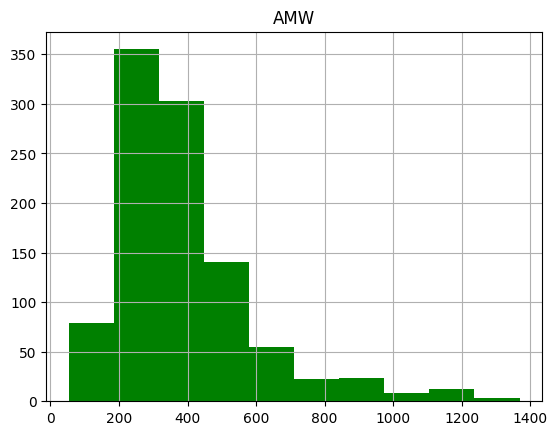

In [149]:
# Molecular weight distribution
DATA.hist(column='AMW', color="green")

In [150]:
DATA = DATA[DATA['AMW']<= float(800)].reset_index(drop = True)
print(DATA.shape)

(953, 5)


In [151]:
#Generación de fragmentos
DATA['All_fragments'] = [ALL_FRAGMENTS(i) for i in DATA['SMILES_no_chiral']]

In [152]:
DATA.head(2)

,ID,SMILES_chiral,SMILES_no_chiral,NPL_score,AMW,All_fragments
0,UNPD_subset_A_1,Cc1cc2c(c(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[...,Cc1cc2c(c(OC3OC(CO)C(O)C(O)C3O)c1O)C(=O)c1c(O)...,2.131,448.100561,"[*C1OC(CO)C(O)C(O)C1O, *c1c(O)c(C)cc2c1C(=O)c1..."
1,UNPD_subset_A_2,NCCCCNCCCCNCCCCN(CCCCN)CCCCNCCCCN,NCCCCNCCCCNCCCCN(CCCCN)CCCCNCCCCN,-0.188,443.467545,"[*CCCC*, *CCCCN, *CCCCN(CCCC*)CCCCN, *CCCCN(CC..."


In [153]:
#agrupar todos los fragmentos de cada fila en una sola columna
def new_list (FRAGMENTOS):
    L2 = []
    for i in DATA['All_fragments']:
        for j in i:
            L2.append(j)
    return (L2)

In [154]:
DATA = DATA.copy()
LF = list(DATA["All_fragments"])
allfrags = new_list(LF)
len(allfrags)

10977

In [155]:
DATA = pd.DataFrame(allfrags, columns=["All_fragments"])
DATA.tail(2)

,All_fragments
10975,*C1OC(CO)C(O)C(O)C1O
10976,*c1ccc(O)cc1CCC(=O)c1c(OC)cccc1OC


In [156]:
lista=DATA["All_fragments"].value_counts()
DATA = pd.DataFrame(lista)
DATA.head(2)

,All_fragments
*C(C)=O,125
*O,77


In [157]:
DATA = pd.DataFrame(lista)
DATA.reset_index().to_csv("DATA_Allfragments.csv",
                        header = True, index = False)

In [158]:
DATA = pd.read_csv("DATA_Allfragments.csv")
DATA.columns = ["All_fragments", "Counts"]
DATA.tail(2)

,All_fragments,Counts
10438,*Oc1cc(O*)c(-c2c(OC(C)=O)cc(OC(C)=O)c(Oc3cc(*)...,1
10439,*c1ccc(O)cc1CCC(=O)c1c(OC)cccc1OC,1


In [159]:
# Change * for hydrogens
def HYDROGENS (smi):
    mol = Chem.MolFromSmiles(smi)
    du = Chem.MolFromSmiles('*')
    mol_h=AllChem.ReplaceSubstructs(mol,du,Chem.MolFromSmiles('[H]'),True)[0]
    smi2 = Chem.MolToSmiles(mol_h)
    #you can then just remove the H atoms :
    mol_h = Chem.RemoveHs(mol_h)
    smi2 = Chem.MolToSmiles(mol_h)
    return smi2

In [160]:
HYDROGENS(smi)

'Cc1cc2c(c(OC3OC(CO)C(O)C(O)C3O)c1O)C(=O)c1c(O)cc(O)cc1C2=O'

In [161]:
DATA.head(2)

,All_fragments,Counts
0,*C(C)=O,125
1,*O,77


In [162]:
#Generación de fragmentos con hidrógenos
DATA['All_fragments_h'] = [HYDROGENS(i) for i in DATA['All_fragments']]
DATA.tail(2)

,All_fragments,Counts,All_fragments_h
10438,*Oc1cc(O*)c(-c2c(OC(C)=O)cc(OC(C)=O)c(Oc3cc(*)...,1,CC(=O)Oc1cc(OC(C)=O)c(-c2c(O)cc(O)cc2OC(C)=O)c...
10439,*c1ccc(O)cc1CCC(=O)c1c(OC)cccc1OC,1,COc1cccc(OC)c1C(=O)CCc1cccc(O)c1


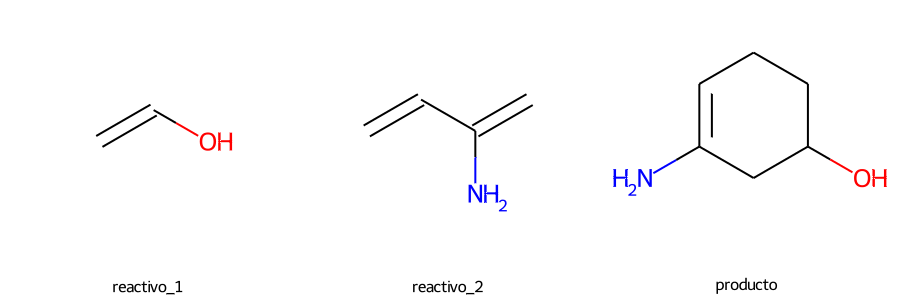

In [163]:
# Example
leyendas = ["reactivo_1", "reactivo_2", "producto"]
estructuras = ['OC=C','C=CC(N)=C','NC1=CCCC(O)C1']
mol = [Chem.MolFromSmiles(x) for x in estructuras]
mols = Chem.Draw.MolsToGridImage(mol, legends=leyendas, molsPerRow=3,
                                subImgSize=(300,300))
mols

In [164]:
DATA.columns

Index(['All_fragments', 'Counts', 'All_fragments_h'], dtype='object')

In [165]:
leyendas = list(DATA['Counts'])[:15]
print(leyendas)
leyendas =[str(i) for i in leyendas]
print(leyendas)
estructuras = list(DATA['All_fragments_h'])[:15]

[125, 77, 43, 24, 23, 16, 15, 15, 14, 12, 10, 10, 9, 9, 7]
['125', '77', '43', '24', '23', '16', '15', '15', '14', '12', '10', '10', '9', '9', '7']


In [166]:
estructuras

['CC=O',
 'O',
 'OCC1OCC(O)C(O)C1O',
 'CO',
 'O=Cc1ccccc1',
 'CCC',
 'CC=C(C)C=O',
 'Oc1ccccc1',
 'CC1OCC(O)C(O)C1O',
 'CC=O',
 'COc1ccccc1',
 'c1ccccc1',
 'OC1COCC(O)C1O',
 'CC1OCC(O)C(O)C1O',
 'Oc1ccccc1O']

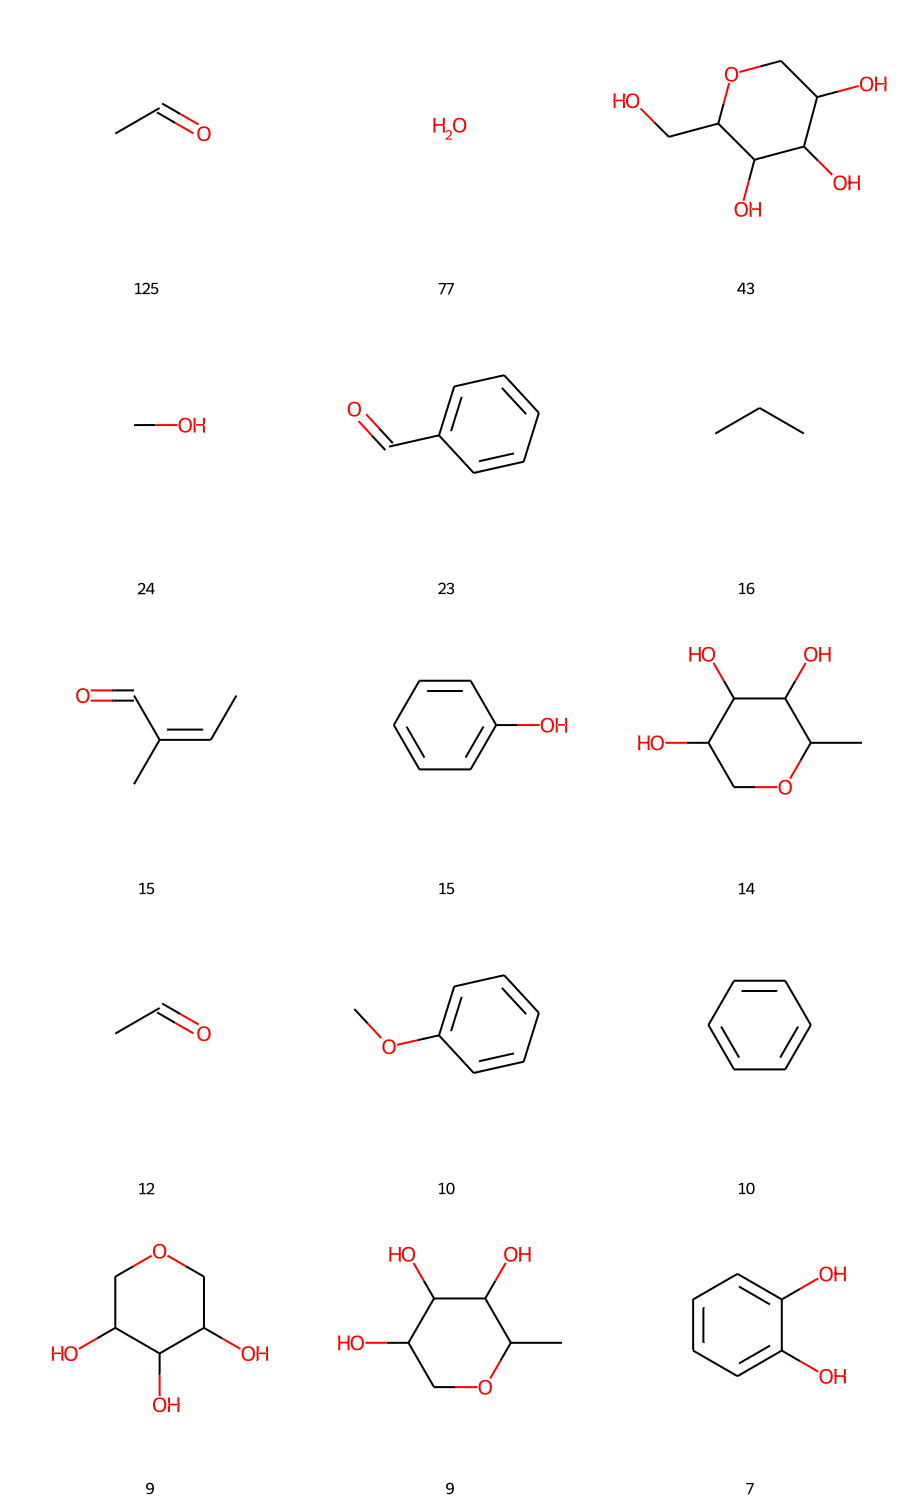

In [167]:
leyendas = leyendas
estructuras = estructuras
mol = [Chem.MolFromSmiles(x) for x in estructuras]
mols = Chem.Draw.MolsToGridImage(mol, legends=leyendas, molsPerRow=3,
                                subImgSize=(300,300))
mols

In [168]:
# Save figure
mols.save("top_fifteenth_all_fragments_DATA.jpg")